# Week 7 Update

In [1]:
import pandas as pd
import numpy as np

In [2]:
joined = pd.read_csv('JOINED_transc+skuinfo+storeinfo.csv')
joined

,sku,store,register,trannum,interid,saledate,stype,quantity,orgprice,amt,...,retail,dept,classid,upc,style,color,size,packsize,vendor,brand
0,1000940,4202,940,4100,0,2004-11-24,P,1,17.5,17.5,...,17.5,2105,125,400000940100,676RKI,CHAMBRAY P,M,1,3622251,SARA LEE
1,1001212,604,20,600,979209136,2004-11-24,R,1,39.0,39.0,...,39.0,8306,272,400001212100,Y J63524,BEET RED,100M,1,5616208,MERRELL/
2,1001224,3807,160,6100,0,2004-11-24,P,1,79.0,79.0,...,79.0,7106,312,400001224100,E991 L-PULS,BLK NAPPA,095M,1,3816210,FRANCO S
3,1002009,4103,930,400,0,2004-11-24,P,1,20.0,20.0,...,20.0,2102,782,400002009100,8004,BLACK,36C,1,4516339,CABERNET
4,1002115,9103,751,1200,0,2004-11-24,P,1,47.0,47.0,...,47.0,5100,007,400002115100,132020,CLAIR,NO SIZE,3,6041161,CHANEL I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98183,9999950,9209,350,200,0,2004-11-24,P,1,13.5,13.5,...,14.0,800,007,400009950999,635P,10BERRY,LL SHINE,3,5511283,CLINIQUE
98184,9999950,8707,130,1000,920900995,2004-11-24,P,1,13.5,13.5,...,14.0,800,007,400009950999,635P,10BERRY,LL SHINE,3,5511283,CLINIQUE
98185,9999950,9504,580,2300,0,2004-11-24,P,1,13.5,13.5,...,14.0,800,007,400009950999,635P,10BERRY,LL SHINE,3,5511283,CLINIQUE
98186,9999950,9709,80,2000,111305954,2004-11-24,P,1,13.5,13.5,...,14.0,800,007,400009950999,635P,10BERRY,LL SHINE,3,5511283,CLINIQUE


### 1 data type

In [3]:
# check the data types
joined.dtypes

sku           int64
store         int64
register      int64
trannum       int64
interid       int64
saledate     object
stype        object
quantity      int64
orgprice    float64
amt         float64
seq           int64
mic           int64
cost        float64
retail      float64
dept          int64
classid      object
upc           int64
style        object
color        object
size         object
packsize      int64
vendor        int64
brand        object
dtype: object

In [4]:
joined['saledate'] = pd.to_datetime(joined['saledate'], format='%Y-%m-%d')
joined.dtypes

sku                  int64
store                int64
register             int64
trannum              int64
interid              int64
saledate    datetime64[ns]
stype               object
quantity             int64
orgprice           float64
amt                float64
seq                  int64
mic                  int64
cost               float64
retail             float64
dept                 int64
classid             object
upc                  int64
style               object
color               object
size                object
packsize             int64
vendor               int64
brand               object
dtype: object

### 2 Missing data

In [5]:
# finding missing data with info
joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98188 entries, 0 to 98187
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   sku       98188 non-null  int64         
 1   store     98188 non-null  int64         
 2   register  98188 non-null  int64         
 3   trannum   98188 non-null  int64         
 4   interid   98188 non-null  int64         
 5   saledate  98188 non-null  datetime64[ns]
 6   stype     98188 non-null  object        
 7   quantity  98188 non-null  int64         
 8   orgprice  98188 non-null  float64       
 9   amt       98188 non-null  float64       
 10  seq       98188 non-null  int64         
 11  mic       98188 non-null  int64         
 12  cost      98188 non-null  float64       
 13  retail    98188 non-null  float64       
 14  dept      98188 non-null  int64         
 15  classid   98188 non-null  object        
 16  upc       98188 non-null  int64         
 17  style     98

In [6]:
# finding missing data within a particular column
joined.color.value_counts(dropna=False)

color
BLACK         6850
WHITE         6421
001BLACK      1253
NAVY          1154
01-BLACK      1153
              ... 
LIL-BK           1
AFT-WT           1
DD900550         1
LGT ORANGE       1
BLK/PERI         1
Name: count, Length: 6507, dtype: int64

In [7]:
# check the number of rows
joined.shape

(98188, 23)

In [8]:
# view only rows with missing data
joined[joined.isna().any(axis=1)]

,sku,store,register,trannum,interid,saledate,stype,quantity,orgprice,amt,...,retail,dept,classid,upc,style,color,size,packsize,vendor,brand
177,1060886,1709,130,300,910709119,2004-11-24,P,1,23.0,23.00,...,23.00,4407,006,400000886106,1465,RETIRED,NaN,1,5816212,WESTLAND
178,1060886,3709,50,400,313006957,2004-11-24,P,1,23.0,23.00,...,23.00,4407,006,400000886106,1465,RETIRED,NaN,1,5816212,WESTLAND
703,107511,103,510,1800,0,2004-11-24,P,1,72.0,72.00,...,72.00,3100,007,400007511010,0 485265,NaN,NaN,3,7216211,BEAUTE P
853,1091014,509,650,4000,0,2004-11-24,P,1,8.0,8.00,...,8.00,2107,008,400001014109,8367,NaN,ALL,36,4513314,EMG EAST
1384,1163956,4902,410,1200,0,2004-11-24,P,1,45.0,19.99,...,11.25,3103,005,400003956116,394231671614,BRITISH TAN,5,1,2726341,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97348,9924796,5204,160,2200,0,2004-11-24,P,1,64.0,64.00,...,16.00,1301,703,400004796992,294652W70319,LIBERTY PINK,1X,1,6413115,NaN
97372,992710,8209,480,1200,587805733,2004-11-24,P,1,9.0,9.00,...,9.00,6402,472,400002710099,66 SKRU16,100WHITE,ALL,1,33396,NaN
97373,992710,7303,780,5800,0,2004-11-24,P,1,9.0,9.00,...,9.00,6402,472,400002710099,66 SKRU16,100WHITE,ALL,1,33396,NaN
97412,9934795,7404,860,800,507608179,2004-11-24,P,1,44.0,22.49,...,11.00,1301,802,400004795993,598403W50224,MIDNIGHT,3X,1,6413115,NaN


In [9]:
joined[joined.isna().any(axis=1)].shape

(936, 23)

In [10]:
# remove rows with mostly missing data
joined_drop = joined.dropna()
joined_drop.shape

(97252, 23)

In [11]:
# view only rows with missing data
joined_drop[joined_drop.isna().any(axis=1)]

,sku,store,register,trannum,interid,saledate,stype,quantity,orgprice,amt,...,retail,dept,classid,upc,style,color,size,packsize,vendor,brand


In [12]:
joined_drop

,sku,store,register,trannum,interid,saledate,stype,quantity,orgprice,amt,...,retail,dept,classid,upc,style,color,size,packsize,vendor,brand
0,1000940,4202,940,4100,0,2004-11-24,P,1,17.5,17.5,...,17.5,2105,125,400000940100,676RKI,CHAMBRAY P,M,1,3622251,SARA LEE
1,1001212,604,20,600,979209136,2004-11-24,R,1,39.0,39.0,...,39.0,8306,272,400001212100,Y J63524,BEET RED,100M,1,5616208,MERRELL/
2,1001224,3807,160,6100,0,2004-11-24,P,1,79.0,79.0,...,79.0,7106,312,400001224100,E991 L-PULS,BLK NAPPA,095M,1,3816210,FRANCO S
3,1002009,4103,930,400,0,2004-11-24,P,1,20.0,20.0,...,20.0,2102,782,400002009100,8004,BLACK,36C,1,4516339,CABERNET
4,1002115,9103,751,1200,0,2004-11-24,P,1,47.0,47.0,...,47.0,5100,007,400002115100,132020,CLAIR,NO SIZE,3,6041161,CHANEL I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98183,9999950,9209,350,200,0,2004-11-24,P,1,13.5,13.5,...,14.0,800,007,400009950999,635P,10BERRY,LL SHINE,3,5511283,CLINIQUE
98184,9999950,8707,130,1000,920900995,2004-11-24,P,1,13.5,13.5,...,14.0,800,007,400009950999,635P,10BERRY,LL SHINE,3,5511283,CLINIQUE
98185,9999950,9504,580,2300,0,2004-11-24,P,1,13.5,13.5,...,14.0,800,007,400009950999,635P,10BERRY,LL SHINE,3,5511283,CLINIQUE
98186,9999950,9709,80,2000,111305954,2004-11-24,P,1,13.5,13.5,...,14.0,800,007,400009950999,635P,10BERRY,LL SHINE,3,5511283,CLINIQUE


### 3. Inconsistent Text & Typos

In [13]:
joined_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97252 entries, 0 to 98187
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   sku       97252 non-null  int64         
 1   store     97252 non-null  int64         
 2   register  97252 non-null  int64         
 3   trannum   97252 non-null  int64         
 4   interid   97252 non-null  int64         
 5   saledate  97252 non-null  datetime64[ns]
 6   stype     97252 non-null  object        
 7   quantity  97252 non-null  int64         
 8   orgprice  97252 non-null  float64       
 9   amt       97252 non-null  float64       
 10  seq       97252 non-null  int64         
 11  mic       97252 non-null  int64         
 12  cost      97252 non-null  float64       
 13  retail    97252 non-null  float64       
 14  dept      97252 non-null  int64         
 15  classid   97252 non-null  object        
 16  upc       97252 non-null  int64         
 17  style     97252 n

In [14]:
# finding missing data within a particular column
joined_drop["style"].value_counts()

style
62A4            1112
2410            1040
645J             962
8     F30G61     756
2228             746
                ... 
VJ    J2562-       1
0     81LYB7       1
TJ    5736KS       1
TJ    7796DG       1
CA7HKUR202AC       1
Name: count, Length: 13773, dtype: int64

### 4. Duplicate

In [15]:
#Duplicated
joined_drop[joined_drop.duplicated()]

,sku,store,register,trannum,interid,saledate,stype,quantity,orgprice,amt,...,retail,dept,classid,upc,style,color,size,packsize,vendor,brand


### 5. Outliers

In [16]:
# view the price column again
joined_drop.retail

0        17.5
1        39.0
2        79.0
3        20.0
4        47.0
         ... 
98183    14.0
98184    14.0
98185    14.0
98186    14.0
98187    14.0
Name: retail, Length: 97252, dtype: float64

In [17]:
import matplotlib.pyplot as plt

In [18]:
columns_to_drop = ['register', 'trannum', 'interid', 'mic', 'saledate', 'seq']

In [19]:
joined_drop.drop(columns=columns_to_drop, inplace=True)

/var/folders/cl/n5df_r612yn353g55xtfs5tm0000gn/T/ipykernel_50518/1569577581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_drop.drop(columns=columns_to_drop, inplace=True)


In [20]:
joined_drop.head()

,sku,store,stype,quantity,orgprice,amt,cost,retail,dept,classid,upc,style,color,size,packsize,vendor,brand
0,1000940,4202,P,1,17.5,17.5,8.4,17.5,2105,125,400000940100,676RKI,CHAMBRAY P,M,1,3622251,SARA LEE
1,1001212,604,R,1,39.0,39.0,18.8,39.0,8306,272,400001212100,Y J63524,BEET RED,100M,1,5616208,MERRELL/
2,1001224,3807,P,1,79.0,79.0,37.0,79.0,7106,312,400001224100,E991 L-PULS,BLK NAPPA,095M,1,3816210,FRANCO S
3,1002009,4103,P,1,20.0,20.0,9.0,20.0,2102,782,400002009100,8004,BLACK,36C,1,4516339,CABERNET
4,1002115,9103,P,1,47.0,47.0,28.2,47.0,5100,007,400002115100,132020,CLAIR,NO SIZE,3,6041161,CHANEL I


# week 8 Update

In [21]:
#check for outliers
joined_drop.retail

0        17.5
1        39.0
2        79.0
3        20.0
4        47.0
         ... 
98183    14.0
98184    14.0
98185    14.0
98186    14.0
98187    14.0
Name: retail, Length: 97252, dtype: float64

In [22]:
# find the outliers that are more than 3 standard deviations away from the mean
price_mean = joined_drop.retail.mean()
price_std = joined_drop.retail.std()

outliers = np.abs(joined_drop.retail - price_mean) > 3 * price_std
joined_drop.retail[outliers]

117      295.0
118      295.0
252      295.0
253      295.0
330      125.0
         ...  
97538    295.0
97970    125.0
97971    125.0
97973    125.0
97974    125.0
Name: retail, Length: 771, dtype: float64

We would use retail price to calculate the profit, although there are outliers in the retail price, but we would NOT deal with it because it is normal that Dillard sells different kind of priducts with wide range of prices. 

## continue to standardize all the scale 

In [23]:
joined_drop.color.value_counts()

color
BLACK         6829
WHITE         6407
001BLACK      1248
01-BLACK      1153
MULTI         1148
              ... 
CHARCOAL/T       1
COPER36C5        1
454BLUE/PR       1
0012871125       1
PURPLE 1         1
Name: count, Length: 6451, dtype: int64

we need to standardize colors 
before cleaning, we have 6451 different colors.

In [24]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
#Drop Null value
joined_drop= joined_drop.dropna()
joined_drop.shape

(97252, 17)

In [26]:
# Define your color categories
color_categories = {
    'Black': ['BLACK', '001BLACK', '01-BLACK', 'CHARCOAL',"BLKNAPPA"],
    'White': ['WHITE', 'BEIGE',"39LOVEYDOVE",'OATMEAL'],
    'Red': ['RED', 'BURGUNDY', 'MAROON',"BEETRED","650ROUGE"],  # Add variations of red here
    'Green': ['GREEN', 'LIME', 'OLIVE',"APPLEGREE"],   # Add variations of green here
    'Yellow': ['YELLOW', 'GOLD', 'AMBER'], # Add variations of yellow here
    'Blue': ['BLUE', 'NAVY', 'CYAN',"CHAMBRAYP"],      # Add variations of blue here
    'Brown': ['BROWN', 'TAN', 'BRONZE',"ROSEWOOD"],   # Add variations of brown here
    'Orange': ['ORANGE', 'CORAL'],         # Add variations of orange here
    'Pink': ['PINK', 'FUCHSIA',"10BERRY"],           # Add variations of pink here
    'Purple': ['PURPLE', 'VIOLET'],        # Add variations of purple here
    'Grey': ['GREY', 'SILVER', 'CHARCOAL'],# Add variations of grey here
    "Silver":["Silver"],
    "Gold":["Gold"],
    "Nocolor":["Nocolor"],
    "Multi":["STONEWASH",'ASSORTED',"CLAIR"]
}

# Function to map colors to categories with improved cleaning
def map_color_to_category(color):
    # Retain significant numbers or characters as needed
    color_cleaned = ''.join(filter(lambda c: c.isalpha() or c.isdigit(), color.upper()))
    for category, color_list in color_categories.items():
        for variation in color_list:
            if variation in color_cleaned:
                return category
    return 'Other'

# Apply the mapping function to the 'color' column
joined_drop['standardized_color'] = joined_drop['color'].apply(map_color_to_category)

joined_drop.head()

,sku,store,stype,quantity,orgprice,amt,cost,retail,dept,classid,upc,style,color,size,packsize,vendor,brand,standardized_color
0,1000940,4202,P,1,17.5,17.5,8.4,17.5,2105,125,400000940100,676RKI,CHAMBRAY P,M,1,3622251,SARA LEE,Blue
1,1001212,604,R,1,39.0,39.0,18.8,39.0,8306,272,400001212100,Y J63524,BEET RED,100M,1,5616208,MERRELL/,Red
2,1001224,3807,P,1,79.0,79.0,37.0,79.0,7106,312,400001224100,E991 L-PULS,BLK NAPPA,095M,1,3816210,FRANCO S,Black
3,1002009,4103,P,1,20.0,20.0,9.0,20.0,2102,782,400002009100,8004,BLACK,36C,1,4516339,CABERNET,Black
4,1002115,9103,P,1,47.0,47.0,28.2,47.0,5100,007,400002115100,132020,CLAIR,NO SIZE,3,6041161,CHANEL I,Multi


In [27]:
#PICK SOME COLORS WE COULD PROCESS FURTHER, LEAVE THOSE WE COULD NOT RECOGNIZE
other_colors_df = joined_drop[joined_drop['standardized_color'] == "Other"]
other_colors_df

,sku,store,stype,quantity,orgprice,amt,cost,retail,dept,classid,upc,style,color,size,packsize,vendor,brand,standardized_color
12,1006384,7402,P,1,48.0,32.16,14.40,12.00,7101,002,400006384100,190031,H. BR FUSC,XL,1,6516189,REPUBLIC,Other
29,1007622,6104,P,1,6.0,4.00,1.80,3.00,1202,404,400007622100,14D028,CARNIVALSTR,S,1,313319,CABERNET,Other
35,1012961,9806,P,1,42.5,42.50,25.50,42.50,800,005,400002961101,66K4,HAPPIER 664K,*DISC,3,5511283,CLINIQUE,Other
36,1014324,9304,P,1,30.0,30.00,11.15,30.00,9105,927,400004324101,00T 1356C0,VINTAGE,36 36,1,6216217,ROUNDTRE,Other
39,1014478,2303,P,1,37.5,37.50,22.50,37.50,6400,004,400004478101,8 7002-9,SHOWER GEL,6.7,3,11679,DESIGNER,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98121,9996028,509,P,1,48.0,48.00,19.63,12.00,2301,002,400006028999,CC932,AMETHYST,M,1,8043525,KORET OF,Other
98124,9996230,7603,P,1,32.0,32.00,12.80,16.00,5404,003,400006230999,85-89 443550,DENIM MEDI,7,1,934938,KIDS HEA,Other
98125,9996269,9402,P,1,58.0,24.99,23.00,14.50,1301,004,400006269999,009H 5E-L20,MEDIUM STO,20W,1,1510974,CM SHAPE,Other
98128,9997198,2104,P,1,25.0,14.99,6.16,6.25,2107,001,400007198999,0 427H15,CLEAR,ALL,4,7149207,MAIN ING,Other


In [28]:
joined_drop.standardized_color.value_counts()

standardized_color
Other     58654
Black     13128
White     10084
Blue       4209
Brown      2368
Red        2177
Grey       1679
Pink       1625
Yellow     1122
Multi      1094
Green       620
Purple      275
Orange      217
Name: count, dtype: int64

In [29]:
len(joined_drop.standardized_color.value_counts())

13

Now, we only have 13 different colors 

In [30]:
#no need to deal with
joined_drop.brand.value_counts()

brand
CLINIQUE    20388
LANCOME      9398
CABERNET     6482
LIZ CLAI     3208
MILCO IN     2057
            ...  
SCULLY          1
REVMAN I        1
DR. LUCK        1
LEARNING        1
J. MARCU        1
Name: count, Length: 542, dtype: int64

In [31]:
#no need to deal with
joined_drop.vendor.value_counts()

vendor
5511283    20388
113645      9398
13031       3266
3626213     2107
2012863     1774
           ...  
7413322        1
5613319        1
3516185        1
5413317        1
7149207        1
Name: count, Length: 717, dtype: int64

In [32]:
#FIND WHAT COLORS CUSTOMERS LIKE TO BUY MOST/ THE COLORS WITH HIGHEST SALES REVENUE


### Size

In [33]:
joined_drop["size"].value_counts()

size
ALL           15174
M              3853
L              3804
NO SIZE        3542
XL             2284
              ...  
MUG/SUNFLR        1
SMOOTHFACE        1
S/6PLT/TRA        1
OVL BAKER         1
TRTMT             1
Name: count, Length: 1501, dtype: int64

Before cleaning the size category, we have 1501 types of sizes.

In [34]:
joined_drop['size'].apply(lambda x: not str(x).isnumeric())

0        True
1        True
2        True
3        True
4        True
         ... 
98183    True
98184    True
98185    True
98186    True
98187    True
Name: size, Length: 97252, dtype: bool

All are not numerical size.

In [35]:
# Count the occurrences of each value in the "size" column
size_counts = joined_drop["size"].value_counts()

# Get the values that appear less than 300
values_to_drop = size_counts[size_counts < 400].index

# Drop rows where "size" is in values_to_drop
joined_drop_i = joined_drop[~joined_drop["size"].isin(values_to_drop)]

In [36]:
joined_drop["size"].value_counts()

size
ALL           15174
M              3853
L              3804
NO SIZE        3542
XL             2284
              ...  
MUG/SUNFLR        1
SMOOTHFACE        1
S/6PLT/TRA        1
OVL BAKER         1
TRTMT             1
Name: count, Length: 1501, dtype: int64

In [37]:
size_categories = {
    "4XS": ["XXXXS", "0", "00", "1"],
    "3XS": ["XXXS", "2", "3", "4"],
    "2XS": ["XXS", "6", "7", "8"],
    "XS": ["XS", "10", "11", "12"],
    "S": ["S", "14", "15", "16"],
    "M": ["M", "18", "19", "20"],
    "L": ["L", "22", "23", "24"],
    "XL": ["XL", "26", "27", "28"],
    "2XL": ["XXL", "30", "31", "32"],
    "3XL": ["XXXL", "34", "35", "36"],
    "4XL": ["XXXXL", "38", "39", "40"],
    "ALL": ["ALL"],
    "NOSIZE": ["NO SIZE"],
    #https://www.meeksshoes.co.uk/pages/sizing-guide
    "10": ["100M"],  #shoes size
    "9.5": ["095M"], #shoes size
    "9": ["090M"],   #shoes size
    "8.5": ["085M"], #shoes size
    "8": ["080M"],   #shoes size
    "7.5": ["075M"], #shoes size
    "7": ["070M"],   #shoes size
    "10": ["100M"]
}

# Function to map sizes to categories with improved cleaning
def map_size_to_category(size):
    for category, size_list in size_categories.items():
        if size in size_list:
            return category
    return 'Other'

# Apply the mapping function to the "size" column
joined_drop["standardized_size"] = joined_drop["size"].apply(map_size_to_category)

# Display the resulting DataFrame
print(joined_drop)


           sku  store stype  quantity  orgprice   amt  cost  retail  dept  \
0      1000940   4202     P         1      17.5  17.5   8.4    17.5  2105   
1      1001212    604     R         1      39.0  39.0  18.8    39.0  8306   
2      1001224   3807     P         1      79.0  79.0  37.0    79.0  7106   
3      1002009   4103     P         1      20.0  20.0   9.0    20.0  2102   
4      1002115   9103     P         1      47.0  47.0  28.2    47.0  5100   
...        ...    ...   ...       ...       ...   ...   ...     ...   ...   
98183  9999950   9209     P         1      13.5  13.5   8.4    14.0   800   
98184  9999950   8707     P         1      13.5  13.5   8.4    14.0   800   
98185  9999950   9504     P         1      13.5  13.5   8.4    14.0   800   
98186  9999950   9709     P         1      13.5  13.5   8.4    14.0   800   
98187  9999950   9709     R         1      13.5  13.5   8.4    14.0   800   

      classid           upc         style       color      size  packsize  

In [38]:
joined_drop["standardized_size"].value_counts()

standardized_size
Other     53380
ALL       15174
2XS        4496
M          3987
L          3910
NOSIZE     3542
XL         2598
S          2038
XS         1299
3XS        1143
2XL         801
4XS         663
3XL         655
8           596
8.5         571
7.5         466
4XL         440
10          433
9           429
9.5         328
7           303
Name: count, dtype: int64

In [39]:
len(joined_drop.standardized_size.value_counts())

21

### Style

In [40]:
joined_drop["style"].value_counts()

style
62A4            1112
2410            1040
645J             962
8     F30G61     756
2228             746
                ... 
VJ    J2562-       1
0     81LYB7       1
TJ    5736KS       1
TJ    7796DG       1
CA7HKUR202AC       1
Name: count, Length: 13773, dtype: int64

In [41]:
joined_drop["style"] = joined_drop["style"].str.replace(r'[^a-zA-Z0-9]', '', regex=True)

# Now, you can check the updated value counts
print(joined_drop["style"].value_counts())

style
62A4            1112
2410            1040
645J             962
8F30G61          756
2228             746
                ... 
VJJ2562            1
081LYB7            1
TJ5736KS           1
TJ7796DG           1
CA7HKUR202AC       1
Name: count, Length: 13773, dtype: int64


<Axes: >

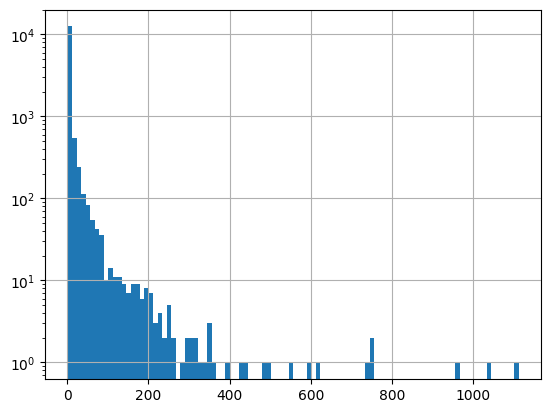

In [42]:
joined_drop["style"].value_counts().hist(bins=100, log=True)

Text(0.5, 1.0, 'Box Plot of Style Counts')

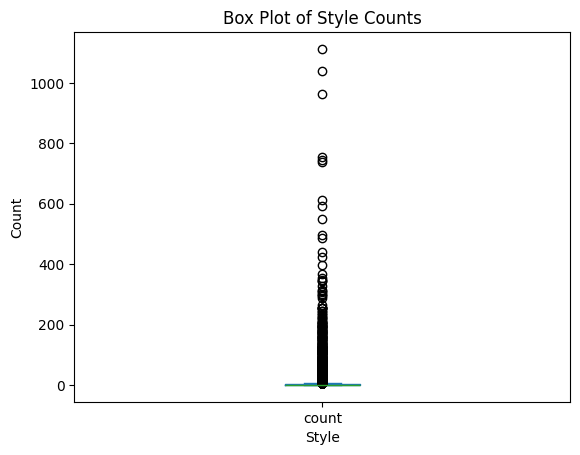

In [43]:
joined_drop["style"].value_counts().plot(kind='box')
plt.xlabel('Style')
plt.ylabel('Count')
plt.title('Box Plot of Style Counts')

We can see that most of the style counts shows a strong right skew. With our primary interesting in detecting the most charateristics of the most popular items, we are going to set a limit c, and drop those style with counts below this limit.

We can see that most of the style counts shows a strong right skew. With our primary interesting in detecting the most charateristics of the most popular items, we are going to set a limit c, and drop those style with counts below this limit.

#### c = 100

In [44]:
style_counts = joined_drop.groupby("style").size().reset_index(name='count')

# Filter out style groups with count less than 1
valid_styles = style_counts[style_counts['count'] > 100]['style']

# Filter the original DataFrame based on valid_styles
joined_drop = joined_drop[joined_drop['style'].isin(valid_styles)]

# Display the result
joined_drop["style"].value_counts()


style
62A4       1112
2410       1040
645J        962
8F30G61     756
2228        746
           ... 
F81S550     106
6CLW        106
0589        105
R315        104
3543        104
Name: count, Length: 134, dtype: int64

<Axes: >

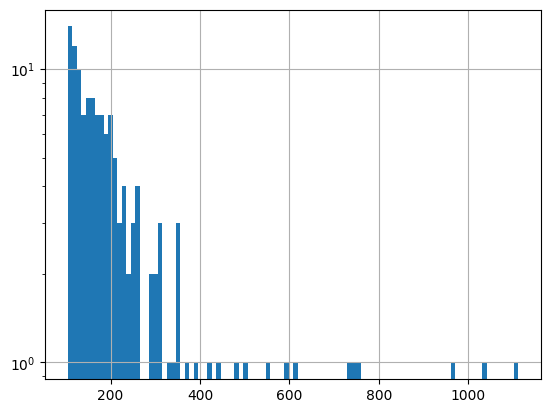

In [45]:
joined_drop["style"].value_counts().hist(bins=100, log=True)

Text(0.5, 1.0, 'Box Plot of Style Counts')

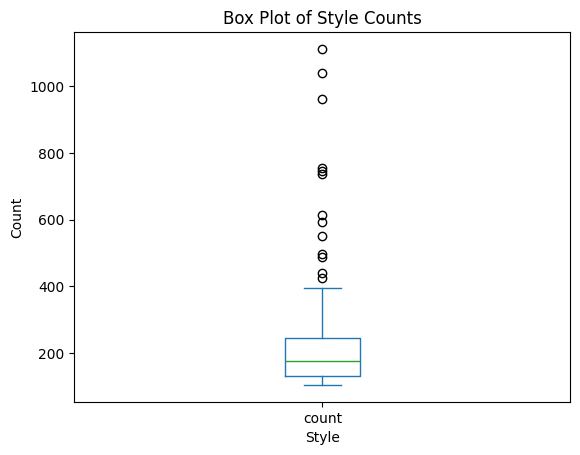

In [46]:
joined_drop["style"].value_counts().plot(kind='box')
plt.xlabel('Style')
plt.ylabel('Count')
plt.title('Box Plot of Style Counts')

In [47]:
joined_drop.shape

(31074, 19)

# Week 9

In [48]:
joined_drop.head()

,sku,store,stype,quantity,orgprice,amt,cost,retail,dept,classid,upc,style,color,size,packsize,vendor,brand,standardized_color,standardized_size
144,1048635,7004,P,1,13.0,9.99,6.94,13.0,6107,001,400008635104,8F30G61,FRESCO YEL,BATH,6,2067178,WESTPOIN,Other,Other
145,1048635,9103,P,1,13.0,9.99,6.94,13.0,6107,001,400008635104,8F30G61,FRESCO YEL,BATH,6,2067178,WESTPOIN,Other,Other
146,1048635,9103,P,1,13.0,9.99,6.94,13.0,6107,001,400008635104,8F30G61,FRESCO YEL,BATH,6,2067178,WESTPOIN,Other,Other
168,1058635,4409,R,1,10.0,7.99,4.56,10.0,6107,001,400008635105,8F30G61,FRESCO YEL,HAND,6,2067178,WESTPOIN,Other,Other
169,1058635,4409,R,1,10.0,7.99,4.56,10.0,6107,001,400008635105,8F30G61,FRESCO YEL,HAND,6,2067178,WESTPOIN,Other,Other


In [49]:
grouped_data = joined_drop.groupby('sku')['retail'].sum().reset_index()
sorted_data = grouped_data.sort_values(by='retail', ascending=False)
sorted_data

,sku,retail
1095,5528349,20129.50
175,994478,10147.00
667,3524026,10097.00
1815,9288109,9602.00
1406,7388142,9027.00
...,...,...
770,3906297,1.25
1488,7922709,1.25
757,3846297,1.25
1042,5196618,1.00


## Feature Engineering

we decide to select the following features:<br>
and they could be divided into 2 categories

categorical:
- style
- standardized_color
- standardized_size
- vendor
- brand

numerical:
- retail price
- packsize

In [50]:
joined_drop["style"].value_counts() 

style
62A4       1112
2410       1040
645J        962
8F30G61     756
2228        746
           ... 
F81S550     106
6CLW        106
0589        105
R315        104
3543        104
Name: count, Length: 134, dtype: int64

In [51]:
joined_drop['vendor'].value_counts() 

vendor
5511283    14724
113645      5330
3626213     1807
2012863     1288
2067178     1101
13031       1026
313319       722
2017178      660
6076489      508
7016341      442
9520439      397
4516339      343
6016957      328
3216218      315
5011295      290
11679        262
8011482      241
6919400      231
7326340      207
3813315      177
1116343      153
1426212      150
6013105      146
7025617      120
6014375      106
Name: count, dtype: int64

In [52]:
len(joined_drop['vendor'].value_counts())

25

In [53]:
joined_drop['brand'].value_counts()

brand
CLINIQUE    14724
LANCOME      5330
CABERNET     2926
MILCO IN     1807
WESTPOIN     1101
HUE           816
NOBLE EX      739
LEVI STR      614
MAIN KNI      442
NOBILITY      315
GREAT AM      290
DESIGNER      262
CROSCILL      241
HUE/KAYS      210
TROPICAL      207
TOMMY HI      177
BURLEN C      160
EUROITAL      153
NOBLE CH      152
ROUNDTRE      150
HENSON-K      138
ROCHESTE      120
Name: count, dtype: int64

standardize retail price and packsize

In [54]:
from sklearn.preprocessing import StandardScaler

# StandardScaler will normalize the features (each column of X, INDIVIDUALLY !!!) so that each column/feature/variable will have mean = 0 and standard deviation = 1.
scaler = StandardScaler()

# Scale the 'retail' and 'packsize' columns
joined_drop[['retail', 'packsize']] = scaler.fit_transform(joined_drop[['retail', 'packsize']])

In [55]:
joined_drop[['retail','packsize']]

,retail,packsize
144,-0.362679,1.804921
145,-0.362679,1.804921
146,-0.362679,1.804921
168,-0.660968,1.804921
169,-0.660968,1.804921
...,...,...
98183,-0.263250,-0.141973
98184,-0.263250,-0.141973
98185,-0.263250,-0.141973
98186,-0.263250,-0.141973


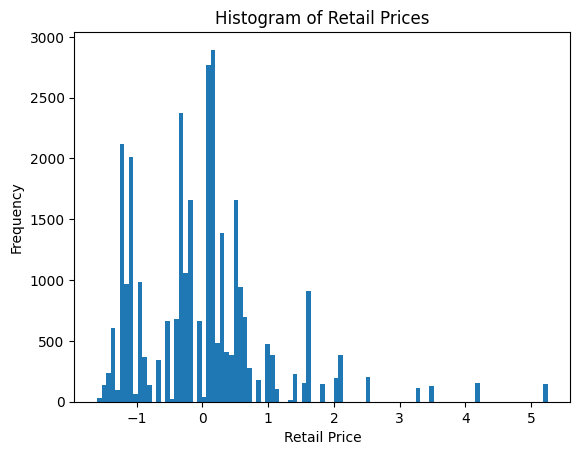

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'joined_drop' is your pandas DataFrame and it's already loaded

# Create a histogram for the 'retail' column
plt.hist(joined_drop['retail'], bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.title('Histogram of Retail Prices')
plt.xlabel('Retail Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

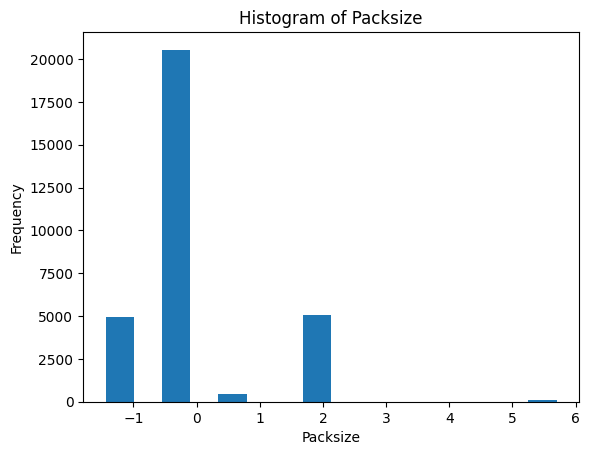

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'joined_drop' is your pandas DataFrame and it's already loaded

# Create a histogram for the 'retail' column
plt.hist(joined_drop['packsize'], bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.title('Histogram of Packsize')
plt.xlabel('Packsize')
plt.ylabel('Frequency')

# Show the plot
plt.show()

I don't think we need to drop ourliers here because it is normal that Dillard sells a wide range of packsize and retail prices.

Now 'retail' and 'packsize' have been standardized.

proceed with only selected features for x matrix

In [58]:
joined_drop.stype.value_counts()

stype
P    29587
R     1487
Name: count, dtype: int64

In [59]:
return_percentage=(937/18676)*100
return_percentage

5.017134289997858

In [60]:
joined_drop.head()

,sku,store,stype,quantity,orgprice,amt,cost,retail,dept,classid,upc,style,color,size,packsize,vendor,brand,standardized_color,standardized_size
144,1048635,7004,P,1,13.0,9.99,6.94,-0.362679,6107,001,400008635104,8F30G61,FRESCO YEL,BATH,1.804921,2067178,WESTPOIN,Other,Other
145,1048635,9103,P,1,13.0,9.99,6.94,-0.362679,6107,001,400008635104,8F30G61,FRESCO YEL,BATH,1.804921,2067178,WESTPOIN,Other,Other
146,1048635,9103,P,1,13.0,9.99,6.94,-0.362679,6107,001,400008635104,8F30G61,FRESCO YEL,BATH,1.804921,2067178,WESTPOIN,Other,Other
168,1058635,4409,R,1,10.0,7.99,4.56,-0.660968,6107,001,400008635105,8F30G61,FRESCO YEL,HAND,1.804921,2067178,WESTPOIN,Other,Other
169,1058635,4409,R,1,10.0,7.99,4.56,-0.660968,6107,001,400008635105,8F30G61,FRESCO YEL,HAND,1.804921,2067178,WESTPOIN,Other,Other


Since we want to investigate whether customer would return or purchase a product based on its features, we must make this sample into a balanced dataset first, we decide to use SMOTE - Synthetic Minority Over-sampling Technique to make it into a balanced dataset.

The regression would focus on whether the product would be returned or not and it could further predict some unknow data. 

Then, we move to K-means to decide What products features would be returned most if they are returned. If they are sold, what product features would be sold best.


regression outline:<br>
y:stype (P or R)<br>
x matrix: retail price, style, standardized_color, standardized_size,packsize, vendor, brand

# Week 10

In [126]:
#select a subset of data to work with
joined_drop=joined_drop[["sku","stype","style","retail","standardized_color","standardized_size","vendor","brand","packsize"]]
joined_drop.head(10)

,sku,stype,style,retail,standardized_color,standardized_size,vendor,brand,packsize
0,1048635,P,8F30G61,-0.362679,Other,Other,2067178,WESTPOIN,1.804921
1,1048635,P,8F30G61,-0.362679,Other,Other,2067178,WESTPOIN,1.804921
2,1048635,P,8F30G61,-0.362679,Other,Other,2067178,WESTPOIN,1.804921
3,1058635,R,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921
4,1058635,R,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921
5,1058635,P,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921
6,1058635,P,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921
7,1058635,R,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921
8,1058635,R,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921
9,1058635,P,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921


In [127]:
joined_drop.shape

(31074, 9)

In [128]:
# Calculate the count of 'R' in 'stype' for each 'sku'
r_count = joined_drop[joined_drop['stype'] == 'R'].groupby('sku').size()

# Calculate the total count for each 'sku'
total_count = joined_drop.groupby('sku').size()

# Compute the return rate
return_rate = round(r_count*100 / total_count,2)

# Convert return_rate to a DataFrame
return_rate_df = return_rate.reset_index().rename(columns={0: 'return_rate(%)'})

# Merge the return rate back into the original DataFrame
joined_drop = joined_drop.merge(return_rate_df, on='sku', how='left')

# Fill NaN values with 0 if there are skus without 'R' in 'stype'
joined_drop['return_rate(%)'].fillna(0, inplace=True)

# Display the first 10 rows
joined_drop.head(20)

,sku,stype,style,retail,standardized_color,standardized_size,vendor,brand,packsize,return_rate(%)
0,1048635,P,8F30G61,-0.362679,Other,Other,2067178,WESTPOIN,1.804921,0.00
1,1048635,P,8F30G61,-0.362679,Other,Other,2067178,WESTPOIN,1.804921,0.00
2,1048635,P,8F30G61,-0.362679,Other,Other,2067178,WESTPOIN,1.804921,0.00
3,1058635,R,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921,44.44
4,1058635,R,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921,44.44
5,1058635,P,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921,44.44
6,1058635,P,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921,44.44
7,1058635,R,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921,44.44
8,1058635,R,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921,44.44
9,1058635,P,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921,44.44


In [129]:
#remove duplicate entries
newdf = joined_drop.groupby('sku').agg({
    'return_rate(%)': 'mean', 
    'style': 'first', 
    'retail': 'mean', 
    'standardized_color': 'first', 
    'standardized_size': 'first', 
    'vendor': 'first', 
    'brand': 'first', 
    'packsize': 'mean'
}).reset_index()
newdf

,sku,return_rate(%),style,retail,standardized_color,standardized_size,vendor,brand,packsize
0,7915,3.45,649G,0.283613,Other,Other,5511283,CLINIQUE,-0.141973
1,9633,8.45,689U,0.581901,Other,Other,5511283,CLINIQUE,-0.141973
2,9951,0.00,635P,-0.263250,Black,Other,5511283,CLINIQUE,-0.141973
3,10896,0.00,60QH,0.184183,Other,Other,5511283,CLINIQUE,-0.141973
4,17915,9.52,649G,0.283613,Other,Other,5511283,CLINIQUE,-0.141973
...,...,...,...,...,...,...,...,...,...
1960,9990073,0.00,R246,0.333327,Other,Other,9520439,CABERNET,-1.439902
1961,9992306,0.00,10Y25UR1,-1.058686,White,3XL,7016341,MAIN KNI,0.506992
1962,9999170,10.34,608E,0.084754,White,Other,5511283,CLINIQUE,-0.141973
1963,9999683,0.00,R246,0.333327,Brown,Other,9520439,CABERNET,-1.439902


In [130]:
newdf["return_rate(%)"].describe()

count    1965.000000
mean        7.046148
std        16.352937
min         0.000000
25%         0.000000
50%         0.000000
75%         6.250000
max       100.000000
Name: return_rate(%), dtype: float64

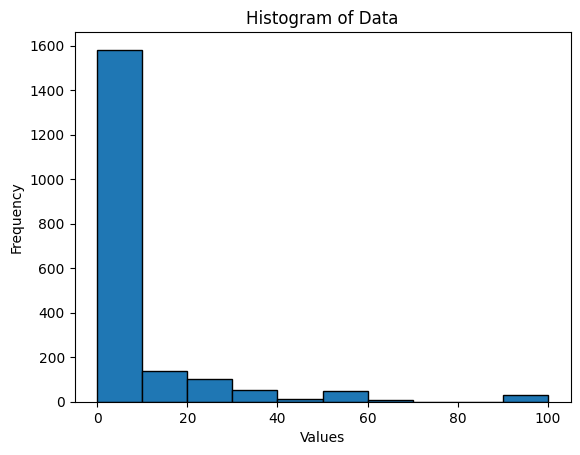

In [131]:
plt.hist(newdf["return_rate(%)"], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Show the plot
plt.show()

In [132]:
#if the return rate is greater than or equal to 0.6, then it is very likely to be returned
#if not, then the product is more prone to be purchased. 
def categorize_product(return_rate):
    if return_rate >= 0.6:
        return "R"
    else:
        return "P"

In [133]:
newdf['Predict P or R'] = newdf['return_rate(%)'].apply(categorize_product)
newdf

,sku,return_rate(%),style,retail,standardized_color,standardized_size,vendor,brand,packsize,Predict P or R
0,7915,3.45,649G,0.283613,Other,Other,5511283,CLINIQUE,-0.141973,R
1,9633,8.45,689U,0.581901,Other,Other,5511283,CLINIQUE,-0.141973,R
2,9951,0.00,635P,-0.263250,Black,Other,5511283,CLINIQUE,-0.141973,P
3,10896,0.00,60QH,0.184183,Other,Other,5511283,CLINIQUE,-0.141973,P
4,17915,9.52,649G,0.283613,Other,Other,5511283,CLINIQUE,-0.141973,R
...,...,...,...,...,...,...,...,...,...,...
1960,9990073,0.00,R246,0.333327,Other,Other,9520439,CABERNET,-1.439902,P
1961,9992306,0.00,10Y25UR1,-1.058686,White,3XL,7016341,MAIN KNI,0.506992,P
1962,9999170,10.34,608E,0.084754,White,Other,5511283,CLINIQUE,-0.141973,R
1963,9999683,0.00,R246,0.333327,Brown,Other,9520439,CABERNET,-1.439902,P


In [134]:
#remove the return rate column and keep just features and predicted y
newdf.drop('return_rate(%)', axis=1, inplace=True)
newdf

,sku,style,retail,standardized_color,standardized_size,vendor,brand,packsize,Predict P or R
0,7915,649G,0.283613,Other,Other,5511283,CLINIQUE,-0.141973,R
1,9633,689U,0.581901,Other,Other,5511283,CLINIQUE,-0.141973,R
2,9951,635P,-0.263250,Black,Other,5511283,CLINIQUE,-0.141973,P
3,10896,60QH,0.184183,Other,Other,5511283,CLINIQUE,-0.141973,P
4,17915,649G,0.283613,Other,Other,5511283,CLINIQUE,-0.141973,R
...,...,...,...,...,...,...,...,...,...
1960,9990073,R246,0.333327,Other,Other,9520439,CABERNET,-1.439902,P
1961,9992306,10Y25UR1,-1.058686,White,3XL,7016341,MAIN KNI,0.506992,P
1962,9999170,608E,0.084754,White,Other,5511283,CLINIQUE,-0.141973,R
1963,9999683,R246,0.333327,Brown,Other,9520439,CABERNET,-1.439902,P


In [135]:
# Find the number of NaN values in each column
nas_per_column = newdf.isna().sum()
nas_per_column

sku                   0
style                 0
retail                0
standardized_color    0
standardized_size     0
vendor                0
brand                 0
packsize              0
Predict P or R        0
dtype: int64

In [136]:
#do one hot encoding for style, standardized_color, standardized_size,vendor, and brand
newdf_encoded = pd.get_dummies(newdf, columns=[
    'style', 'standardized_color', 'standardized_size', 'vendor', 'brand'])
newdf_encoded = newdf_encoded * 1
newdf_encoded

,sku,retail,packsize,Predict P or R,style_006U64012,style_00Y25UR1,style_01Y25UR1,style_0589,style_064115184,style_0F30G87,...,brand_MAIN KNI,brand_MILCO IN,brand_NOBILITY,brand_NOBLE CH,brand_NOBLE EX,brand_ROCHESTE,brand_ROUNDTRE,brand_TOMMY HI,brand_TROPICAL,brand_WESTPOIN
0,7915,0.283613,-0.141973,R,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9633,0.581901,-0.141973,R,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9951,-0.263250,-0.141973,P,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10896,0.184183,-0.141973,P,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17915,0.283613,-0.141973,R,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,9990073,0.333327,-1.439902,P,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1961,9992306,-1.058686,0.506992,P,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1962,9999170,0.084754,-0.141973,R,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1963,9999683,0.333327,-1.439902,P,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
#check values
newdf_encoded[newdf_encoded["style_00Y25UR1"] == 1]

,sku,retail,packsize,Predict P or R,style_006U64012,style_00Y25UR1,style_01Y25UR1,style_0589,style_064115184,style_0F30G87,...,brand_MAIN KNI,brand_MILCO IN,brand_NOBILITY,brand_NOBLE CH,brand_NOBLE EX,brand_ROCHESTE,brand_ROUNDTRE,brand_TOMMY HI,brand_TROPICAL,brand_WESTPOIN
1900,9692306,-0.859827,0.506992,R,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1902,9702306,-0.859827,0.506992,R,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1904,9712306,-0.859827,0.506992,R,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [138]:
import sklearn
print(sklearn.__version__)

1.3.2


In [139]:
# check version number
import imblearn
print(imblearn.__version__)

0.11.0


In [140]:
# Replace 'class_column' with the actual name of your target column
X = newdf_encoded.drop(['Predict P or R',"sku"], axis=1)
y = newdf_encoded['Predict P or R']

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

[[189  77]
 [ 53  74]]


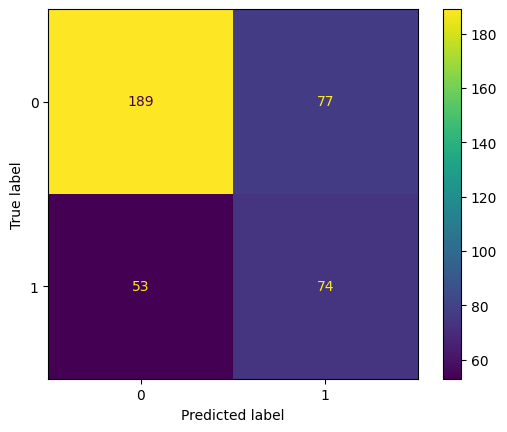

In [142]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")
# Assume y_test are the true labels and y_pred are the model's predictions
# y_test = [...]
# y_pred = [...]

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# For a nicer display
ConfusionMatrixDisplay(cm).plot()

# If you're using Jupyter Notebook or similar, you might need to add this to display the plot:
import matplotlib.pyplot as plt
plt.show()

In [143]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           P       0.78      0.71      0.74       266
           R       0.49      0.58      0.53       127

    accuracy                           0.67       393
   macro avg       0.64      0.65      0.64       393
weighted avg       0.69      0.67      0.68       393

Accuracy: 0.6692111959287532


# k means

In [154]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Specify a range of cluster numbers to try
cluster_range = range(3, 8)

for num_clusters in cluster_range:
    # Training phase
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init='auto')
    kmeans.fit(X_train_resampled)

    # Assign clusters to the training and test datasets
    train_cluster_assignments = kmeans.predict(X_train_resampled)
    test_cluster_assignments = kmeans.predict(X_test)

    # Add cluster assignments as new features
    X_train_with_clusters = np.column_stack((X_train_resampled, train_cluster_assignments))
    X_test_with_clusters = np.column_stack((X_test, test_cluster_assignments))

    # Train a Logistic Regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train_with_clusters, y_train_resampled)

    # Make predictions on the test set
    y_pred = model.predict(X_test_with_clusters)

    # Evaluate and print the performance metrics for each cluster number
    print(f"Number of Clusters: {num_clusters}")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("-----")


Number of Clusters: 3
              precision    recall  f1-score   support

           P       0.78      0.71      0.75       266
           R       0.49      0.58      0.53       127

    accuracy                           0.67       393
   macro avg       0.64      0.65      0.64       393
weighted avg       0.69      0.67      0.68       393

Accuracy: 0.6717557251908397
-----
Number of Clusters: 4
              precision    recall  f1-score   support

           P       0.78      0.71      0.74       266
           R       0.49      0.58      0.53       127

    accuracy                           0.67       393
   macro avg       0.64      0.65      0.64       393
weighted avg       0.69      0.67      0.68       393

Accuracy: 0.6692111959287532
-----
Number of Clusters: 5
              precision    recall  f1-score   support

           P       0.78      0.71      0.75       266
           R       0.49      0.58      0.53       127

    accuracy                           0.67   

## Random Forest classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6361323155216285
Confusion Matrix:
[[187  79]
 [ 64  63]]
Classification Report:
              precision    recall  f1-score   support

           P       0.75      0.70      0.72       266
           R       0.44      0.50      0.47       127

    accuracy                           0.64       393
   macro avg       0.59      0.60      0.60       393
weighted avg       0.65      0.64      0.64       393

